In [1]:
# DSW Assignment 1 Problem 3
# Name: Yue Liu
# NetID: yl992

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import DBSCAN  
from sklearn.neighbors import NearestNeighbors


/Users/qu4ntum/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:title={'center':'Boxplot for Price'}>

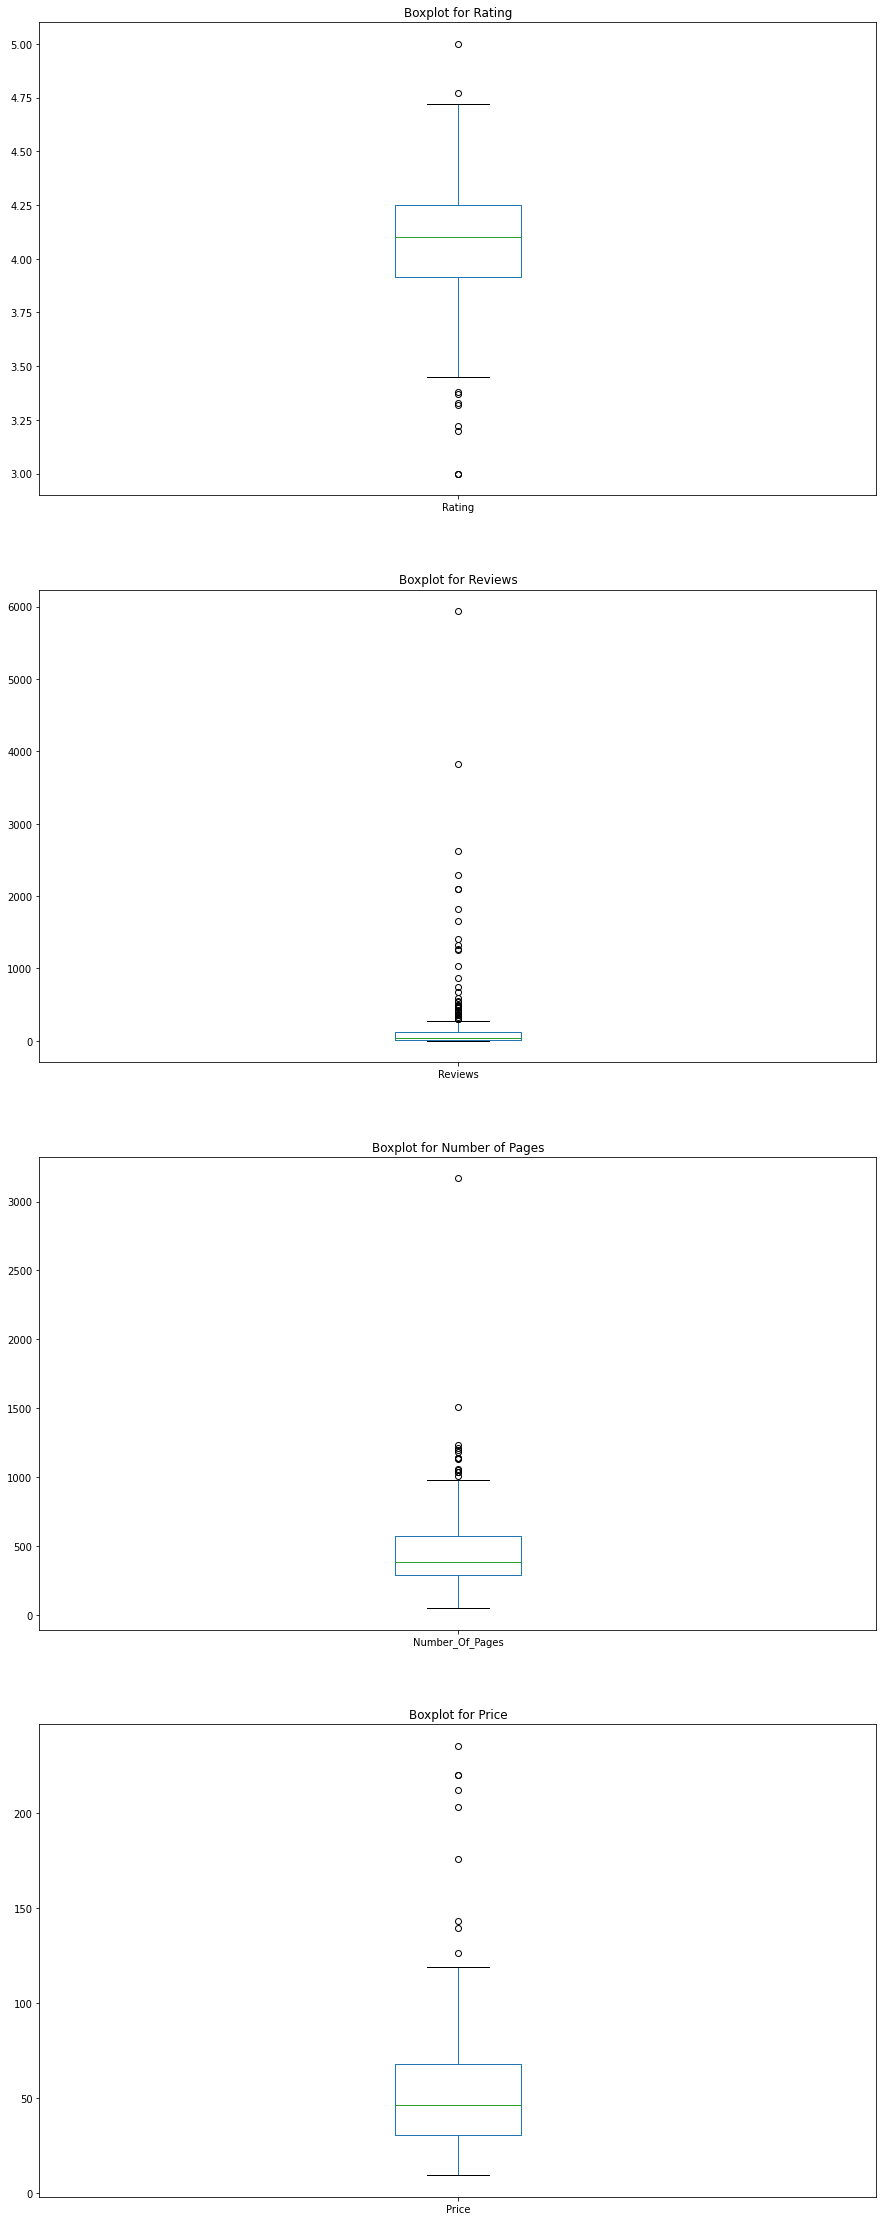

In [3]:
#Task 1
data = pd.read_csv('./prog_book.csv')
def cleaning(df):
    for i in range(len(df)):
        
        df[i] = df[i].replace(",","")

# cleaning(data['Rating'])
cleaning(data['Reviews'])
# cleaning(data['Number_Of_Pages'])
# cleaning(data['Price'])


plt.figure(figsize=(15,40))
plt.subplot(4,1,1)
data['Rating'].plot.box(title = 'Boxplot for Rating')
plt.subplot(4,1,2)
data['Reviews'] = pd.to_numeric(data['Reviews'])
data['Reviews'].plot.box(title = 'Boxplot for Reviews')
plt.subplot(4,1,3)
data['Number_Of_Pages'].plot.box(title = 'Boxplot for Number of Pages')
plt.subplot(4,1,4)
data['Price'].plot.box(title = 'Boxplot for Price')


/Users/qu4ntum/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/qu4ntum/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/qu4ntum/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0.5, 1.0, 'Number Of Pages v.s. Type')

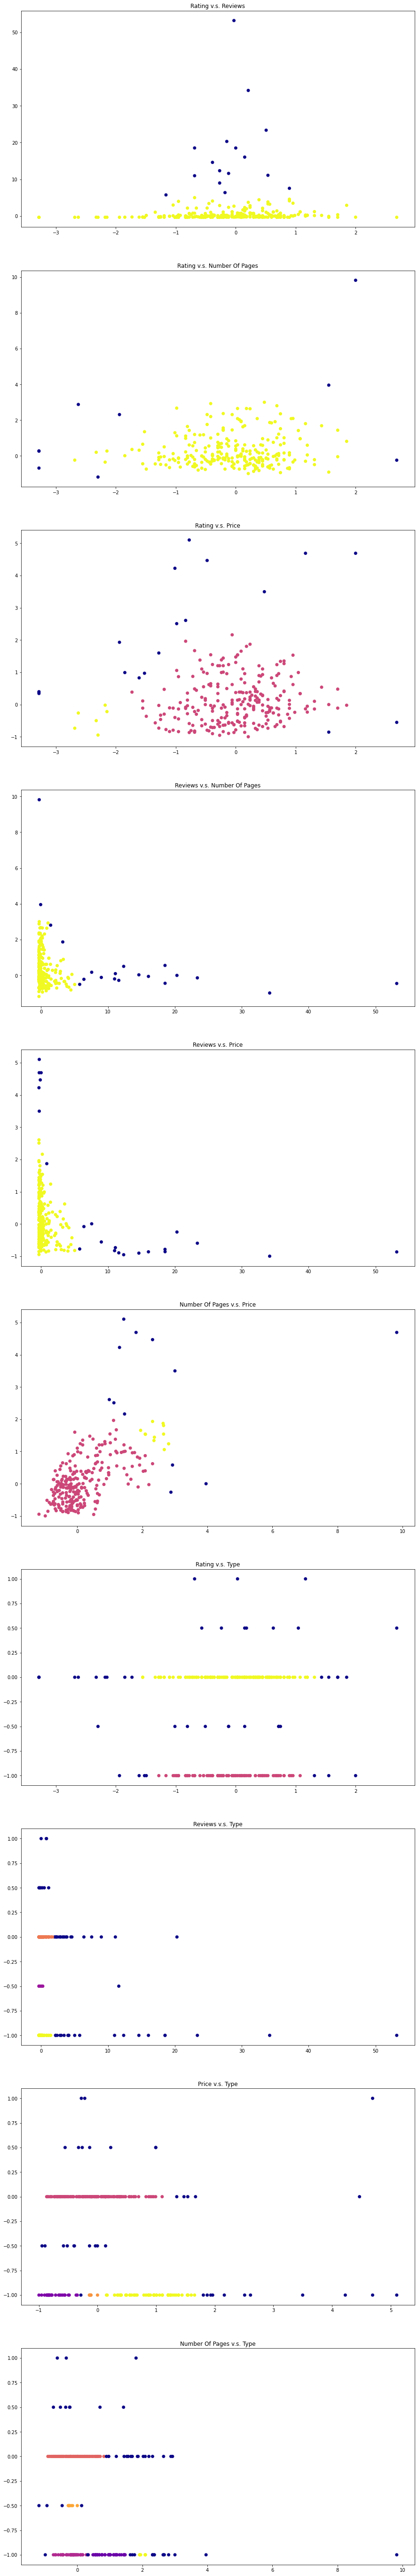

In [4]:
#Task 2
ss = RobustScaler()
def find_Epsilon(data): #This method automatically find a idea (good but not guranteed to be the best) epsilon value for given dataset 
    neighb = NearestNeighbors(n_neighbors=2) 
    nbrs=neighb.fit(data) 
    distances,indices=nbrs.kneighbors(data) 
    distances = np.sort(distances, axis = 0) 
    distances = distances[:, 1] 
    # print(np.quantile(distances,0.9))
    return 2.4*np.quantile(distances,0.9)


#Transform 'Type' categorical data into numerical
for i in range(len(data['Type'])):
    if data['Type'][i] == 'Hardcover':
        data['Type'][i] = 0
    elif data['Type'][i] == 'Kindle Edition':
        data['Type'][i] = 1
    elif data['Type'][i] == 'Paperback':
        data['Type'][i] = 2 
    elif data['Type'][i] == 'ebook':
        data['Type'][i] = 3
    else:
        data['Type'][i] = 4



data1 = ss.fit_transform(data.loc[:, ['Rating','Reviews']].values)
data2 = ss.fit_transform(data.loc[:, ['Rating','Number_Of_Pages']].values)
data3 = ss.fit_transform(data.loc[:, ['Rating','Price']].values)
data4 = ss.fit_transform(data.loc[:, ['Reviews','Number_Of_Pages']].values)
data5 = ss.fit_transform(data.loc[:, ['Reviews','Price']].values)
data6 = ss.fit_transform(data.loc[:, ['Number_Of_Pages','Price']].values)
data7 = ss.fit_transform(data.loc[:, ['Rating','Type']].values)
data8 = ss.fit_transform(data.loc[:, ['Reviews','Type']].values)
data9 = ss.fit_transform(data.loc[:, ['Price','Type']].values)
data10 = ss.fit_transform(data.loc[:, ['Number_Of_Pages','Type']].values)



# All data have dimension of 2, use min_samples = 4
dbscan1 = DBSCAN(min_samples = 6, eps = find_Epsilon(data1)).fit(data1)
dbscan2 = DBSCAN(min_samples = 6, eps = find_Epsilon(data2)).fit(data2)
dbscan3 = DBSCAN(min_samples = 6, eps = find_Epsilon(data3)).fit(data3)
dbscan4 = DBSCAN(min_samples = 6, eps = find_Epsilon(data4)).fit(data4)
dbscan5 = DBSCAN(min_samples = 6, eps = find_Epsilon(data5)).fit(data5)
dbscan6 = DBSCAN(min_samples = 6, eps = find_Epsilon(data6)).fit(data6)
dbscan7 = DBSCAN(min_samples = 6, eps = find_Epsilon(data7)).fit(data7)
dbscan8 = DBSCAN(min_samples = 6, eps = find_Epsilon(data8)).fit(data8)
dbscan9 = DBSCAN(min_samples = 6, eps = find_Epsilon(data9)).fit(data9)
dbscan10 = DBSCAN(min_samples = 6, eps = find_Epsilon(data10)).fit(data10)

plt.figure(figsize=(15,100))
plt.subplot(10,1,1)
plt.scatter(data1[:, 0], data1[:,1], c = dbscan1.labels_, cmap= "plasma")
plt.title('Rating v.s. Reviews')

plt.subplot(10,1,2)
plt.scatter(data2[:, 0], data2[:,1], c = dbscan2.labels_, cmap= "plasma")
plt.title('Rating v.s. Number Of Pages')

plt.subplot(10,1,3)
plt.scatter(data3[:, 0], data3[:,1], c = dbscan3.labels_, cmap= "plasma")
plt.title('Rating v.s. Price')
plt.subplot(10,1,4)
plt.scatter(data4[:, 0], data4[:,1], c = dbscan4.labels_, cmap= "plasma")
plt.title('Reviews v.s. Number Of Pages')

plt.subplot(10,1,5)
plt.scatter(data5[:, 0], data5[:,1], c = dbscan5.labels_, cmap= "plasma")
plt.title('Reviews v.s. Price')

plt.subplot(10,1,6)
plt.scatter(data6[:, 0], data6[:,1], c = dbscan6.labels_, cmap= "plasma")
plt.title('Number Of Pages v.s. Price')

plt.subplot(10,1,7)
plt.scatter(data7[:, 0], data7[:,1], c = dbscan7.labels_, cmap= "plasma")
plt.title('Rating v.s. Type')

plt.subplot(10,1,8)
plt.scatter(data8[:, 0], data8[:,1], c = dbscan8.labels_, cmap= "plasma")
plt.title('Reviews v.s. Type')

plt.subplot(10,1,9)
plt.scatter(data9[:, 0], data9[:,1], c = dbscan9.labels_, cmap= "plasma")
plt.title('Price v.s. Type')

plt.subplot(10,1,10)
plt.scatter(data10[:, 0], data10[:,1], c = dbscan10.labels_, cmap= "plasma")
plt.title('Number Of Pages v.s. Type')


Text(0.5, 0.92, 'Price v.s. Number Of Pages v.s. Type')

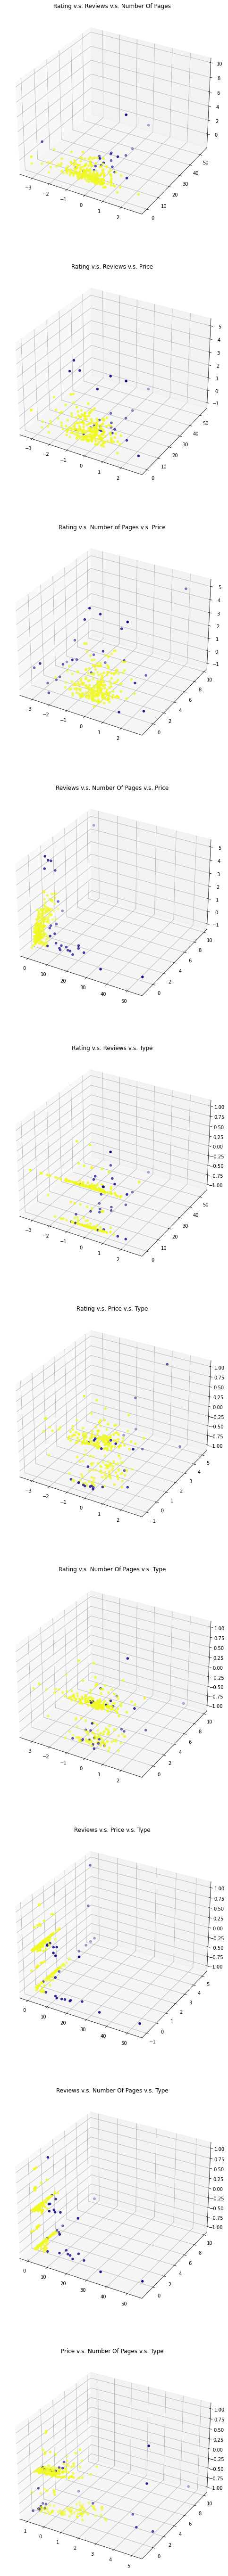

In [5]:
#Task 2 continued
def find_Epsilon_3D(data): #This method automatically find a idea (good but not guranteed to be the best) epsilon value for given dataset 
    neighb = NearestNeighbors(n_neighbors=2) 
    nbrs=neighb.fit(data) 
    distances,indices=nbrs.kneighbors(data) 
    distances = np.sort(distances, axis = 0) 
    distances = distances[:, 1] 
    return 1.4*np.quantile(distances,0.9)

data1 = ss.fit_transform(data.loc[:, ['Rating','Reviews', 'Number_Of_Pages']].values)
data2 = ss.fit_transform(data.loc[:, ['Rating','Reviews', 'Price']].values)
data3 = ss.fit_transform(data.loc[:, ['Rating','Number_Of_Pages', 'Price']].values)
data4 = ss.fit_transform(data.loc[:, ['Reviews', 'Number_Of_Pages', 'Price']].values)
data5 = ss.fit_transform(data.loc[:, ['Rating','Reviews', 'Type']].values)
data6 = ss.fit_transform(data.loc[:, ['Rating','Price', 'Type']].values)
data7 = ss.fit_transform(data.loc[:, ['Rating','Number_Of_Pages', 'Type']].values)
data8 = ss.fit_transform(data.loc[:, ['Reviews', 'Price', 'Type']].values)
data9 = ss.fit_transform(data.loc[:, ['Reviews','Number_Of_Pages', 'Type']].values)
data10 = ss.fit_transform(data.loc[:, ['Price', 'Number_Of_Pages', 'Type']].values)

# All data have dimension of 3, use min_samples = 6
dbscan1 = DBSCAN(min_samples = 6, eps = find_Epsilon_3D(data1)).fit(data1)
dbscan2 = DBSCAN(min_samples = 6, eps = find_Epsilon_3D(data2)).fit(data2)
dbscan3 = DBSCAN(min_samples = 6, eps = find_Epsilon_3D(data3)).fit(data3)
dbscan4 = DBSCAN(min_samples = 6, eps = find_Epsilon_3D(data4)).fit(data4)
dbscan5 = DBSCAN(min_samples = 6, eps = find_Epsilon_3D(data5)).fit(data5)
dbscan6 = DBSCAN(min_samples = 6, eps = find_Epsilon_3D(data6)).fit(data6)
dbscan7 = DBSCAN(min_samples = 6, eps = find_Epsilon_3D(data7)).fit(data7)
dbscan8 = DBSCAN(min_samples = 6, eps = find_Epsilon_3D(data8)).fit(data8)
dbscan9 = DBSCAN(min_samples = 6, eps = find_Epsilon_3D(data9)).fit(data9)
dbscan10 = DBSCAN(min_samples = 6, eps = find_Epsilon_3D(data10)).fit(data10)

fig = plt.figure(figsize=(15,100))
ax = fig.add_subplot(10, 1, 1, projection='3d')
ax.scatter3D(data1[:, 0], data1[:,1], data1[:,2], c = dbscan1.labels_, cmap= "plasma")
plt.title('Rating v.s. Reviews v.s. Number Of Pages')

ax = fig.add_subplot(10, 1, 2, projection='3d')
ax.scatter3D(data2[:, 0], data2[:,1], data2[:,2],  c = dbscan2.labels_, cmap= "plasma")
plt.title('Rating v.s. Reviews v.s. Price')

ax = fig.add_subplot(10, 1, 3, projection='3d')
ax.scatter3D(data3[:, 0], data3[:,1], data3[:,2],  c = dbscan3.labels_, cmap= "plasma")
plt.title('Rating v.s. Number of Pages v.s. Price')

ax = fig.add_subplot(10, 1, 4, projection='3d')
ax.scatter3D(data4[:, 0], data4[:,1], data4[:,2],  c = dbscan4.labels_, cmap= "plasma")
plt.title('Reviews v.s. Number Of Pages v.s. Price')

ax = fig.add_subplot(10, 1, 5, projection='3d')
ax.scatter3D(data5[:, 0], data5[:,1], data5[:,2],  c = dbscan4.labels_, cmap= "plasma")
plt.title('Rating v.s. Reviews v.s. Type')

ax = fig.add_subplot(10, 1, 6, projection='3d')
ax.scatter3D(data6[:, 0], data6[:,1], data6[:,2],  c = dbscan4.labels_, cmap= "plasma")
plt.title('Rating v.s. Price v.s. Type')

ax = fig.add_subplot(10, 1, 7, projection='3d')
ax.scatter3D(data7[:, 0], data7[:,1], data7[:,2],  c = dbscan4.labels_, cmap= "plasma")
plt.title('Rating v.s. Number Of Pages v.s. Type')

ax = fig.add_subplot(10, 1, 8, projection='3d')
ax.scatter3D(data8[:, 0], data8[:,1], data8[:,2],  c = dbscan4.labels_, cmap= "plasma")
plt.title('Reviews v.s. Price v.s. Type')

ax = fig.add_subplot(10, 1, 9, projection='3d')
ax.scatter3D(data9[:, 0], data9[:,1], data9[:,2],  c = dbscan4.labels_, cmap= "plasma")
plt.title('Reviews v.s. Number Of Pages v.s. Type')

ax = fig.add_subplot(10, 1, 10, projection='3d')
ax.scatter3D(data10[:, 0], data10[:,1], data10[:,2],  c = dbscan4.labels_, cmap= "plasma")
plt.title('Price v.s. Number Of Pages v.s. Type')


